# Exercício guiado de Machine Learning

## Advanced analytics no mercado de vinho
_________

Suponha que você é um cientista de dados que trabalha na área de *advanced analytics* de uma empresa especializada na distribuição e vendas de vinhos tintos. Naturalmente, a empresa está interessada em vender vinhos que sejam percebidos como bons por grande parte do público. Pensando nisso, foi feita uma pesquisa, na qual vinhos tintos com diferentes características físico-químicas foram oferecidos a alguns voluntários, que, após experimentá-los, deram notas de 0 a 10. A base coletada contém as seguintes informações:

- Medidas de 11 variáveis físico-químicas que caracterizam cada amostra (as features do problema):
<br><br>
    - 1 - fixed acidity - medida da acidez devido à presença de ácidos orgânicos de baixa volatilidade (ácido málico, lático, tartárico ou cítrico) no vinho;
    - 2 - volatile acidity - medida da acidez devido a ácidos de baixo peso molecular (sobretudo ácido acético) presentes no vinho, que são responsáveis pelo aroma e gosto de vinagre;
    - 3 - citric acid - medida de ácido cítrico no vinho;
    - 4 - residual sugar - medida de açúcar residual presente no vinho, com origem nos resíduos de açúcar da uva que permanecem no vinho após o fim da fermentação;
    - 5 - chlorides - medida de cloretos (íons de cloro) no vinho;
    - 6 - free sulfur dioxide - medida de dióxido de enxofre livre (isto é, que não está ligado a outras moléculas) no vinho;
    - 7 - total sulfur dioxide - medida de dióxido de enxofre total (livre + porção ligada a outras moléculas) no vinho;
    - 8 - density - medida da densidade do vinho;
    - 9 - pH - medida do pH do vinho;
    - 10 - sulphates - medida de sulfatos (íons SO₄²⁻) no vinho;
    - 11 - alcohol - medida da graduação alcoólica do vinho.
<br><br>
- Além disso, há a variável resposta que no caso é um score numérico:
<br><br>
    - 12 - quality - score numérico de qualidade (de 0 a 10), produzido com base em dados sensoriais.

Com base nestes dados coletados, seu objetivo é produzir um modelo capaz de distinguir vinhos bons de ruins, com base nas medidas de suas características físico-químicas. 

Uma vez que tenhamos este modelo, caso produtoras de vinho ofereçam um novo vinho para ser vendido por sua empresa, será possível decidir de maneira mais direcionada se vale a pena passar a vender este produto ou não, de acordo com a predição de sua qualidade dada pelo modelo.

Dentro deste contexto, seu objetivo como cientista de dados é claro:

> Agregar valor ao negócio, explorando os dados que você tem à disposição.

Na primeira sprint do projeto, você e outros colegas do time de ciência de dados chegaram na seguinte _TO-DO list_ para o desenvolvimento do projeto:

- [ ] Ingestão dos dados e detalhada análise exploratória
- [ ] Formulação do problema
- [ ] Primeiro modelo baseline
- [ ] Iterações pelo ciclo de modelagem
- [ ] Compilação dos resultados para o negócio
- [ ] Comunicação dos resultados

Com base na TO-DO list acima, o time de data science quebrou a análise exploratória em algumas perguntas importantes a serem respondidas, antes da etapa de modelagem.

Agora é com você! Bom trabalho, e divirta-se! :D

_________

*Obs.: Naturalmente, o enunciado acima foi apenas uma historinha que criei pra motivar o problema em um contexto de negócio, rs. Para maiores informações sobre a coleta e origem real dos dados, veja a página do dataset no repositório UCI machine learning repository, [disponível aqui!](https://archive.ics.uci.edu/ml/datasets/wine+quality)* 

_________

Vamos começar pelos primeiros pontos da TO-DO list:

- [ ] Ingestão dos dados e detalhada análise exploratória
- [ ] Formulação do problema

_______

1) Leia o arquivo csv `winequality-red.csv`, construindo um Data Frame do pandas. Responda:

- Quantas linhas há no dataset?
- Quantas colunas há no dataset?
- Quais os tipos de dados em cada coluna?
- Há dados nulos (null, missing) na base?

In [3]:
#importando libs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
red_wine = pd.read_csv('winequality-red.csv')

In [10]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


_______

2) Utilizando a base de vinhos tintos, estude a distribuição das variáveis numéricas, calculando, para cada coluna, as principais estatísticas descritivas de posição (média, mediana, quartis, etc.) e de dispersão (std, IQR, etc.). Se desejar, visualize as distribuições de cada variável na amostra.

In [16]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


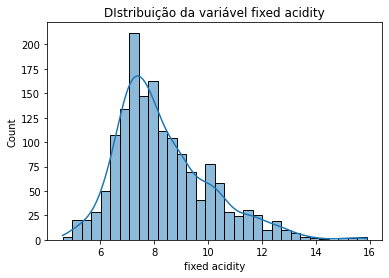

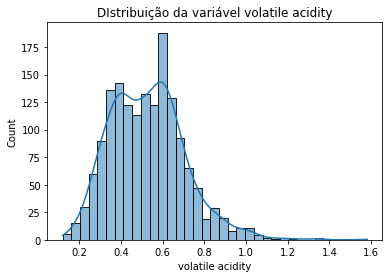

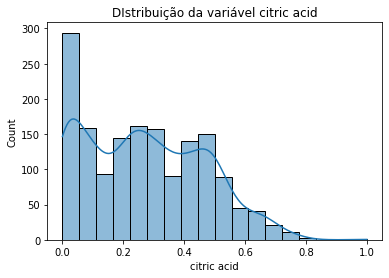

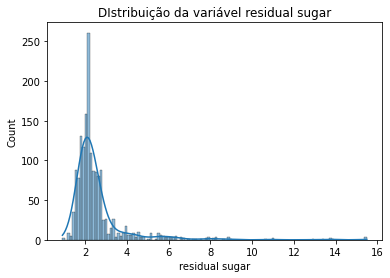

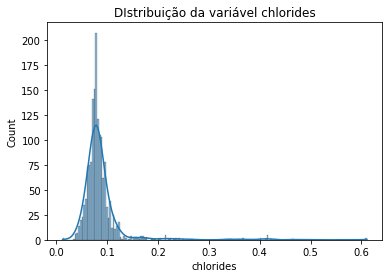

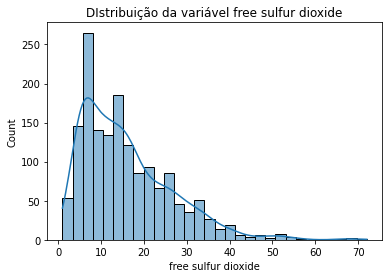

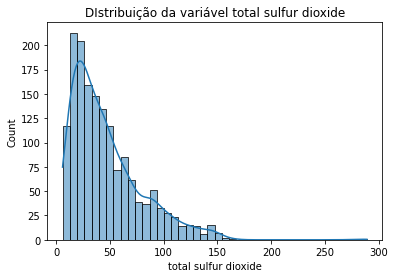

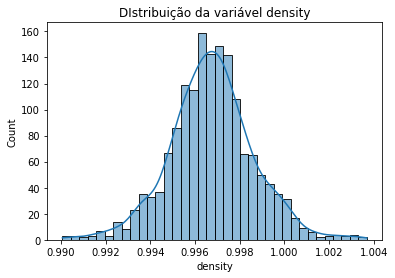

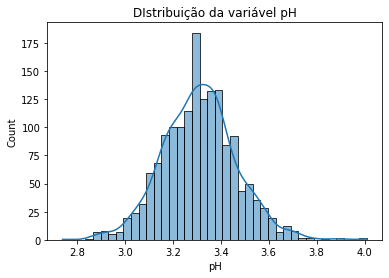

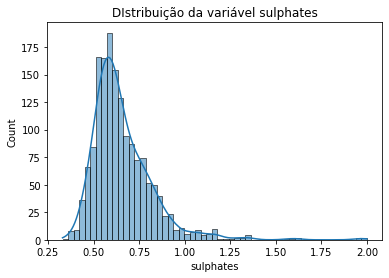

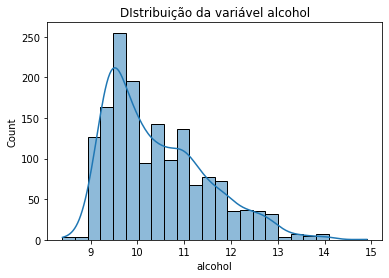

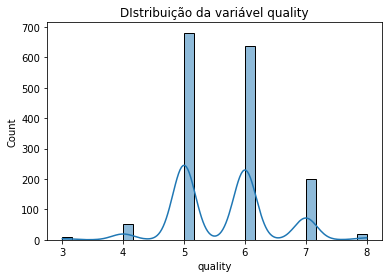

In [29]:
for col in red_wine:
    sns.histplot(data=red_wine, x=col,  kde=True).set_title(f'DIstribuição da variável {col}')
    plt.show()

_______

3) Utilizando a base de vinhos tintos, responda: existe alguma coluna com outliers? Indique qual método de detecção de outliers você utilizou, justificando seu uso.

_______

4) Utilizando a base de vinhos tintos, estude os dados na coluna `quality`, que é a variável resposta do problema. Em particular, responda:

- Essa é uma variável contínua ou discreta?
- Como as notas estão distribuídas? Quais as notas mais/menos comuns?
- Faz sentido discretizar esta variável em dois níveis categóricos? 
    - Se sim, qual seria o valor de corte, e, com este corte, qual é o significado de cada nível categórico?
    - Como estes dois níveis categóricos estão distribuídos?

_______

5) Utilizando a base de vinhos tintos, calcule e/ou visualize a correlação (utilizando a relação que achar mais adequada) entre as variáveis na base. 

Em particular, estude a correlação entre as features e o target `quality`, e responda se há correlações fortes.

Plote também a relação entre cada uma das features e o target (na forma de um scatterplot, por exemplo).

Com base nas análises acima, responda: é uma boa ideia modelar o problema como um problema de regressão? Se sim, que métodos de aprendizagem você utilizaria?

_______

6) Utilizando a base de vinhos tintos, calcule e/ou visualize (em um gráfico de barras, ou como preferir) o intervalo de confiança de 90% para a média de cada uma das variáveis físico-químicas, agrupadas pelos níveis categóricos da variável resposta `quality`. Que conclusões são possíveis tirar destes gráficos?

Sugestão: utilizar o seaborn para a visualização.

_______

7) Utilizando a base de vinhos tintos, discretize a variável resposta `quality` em dois níveis categóricos para transformar o problema em um problema de classificação binária. Como valor de corte, utilize aquele que seja tal que os dois níveis categóricos estejam o mais igualmente distribuídos possível (isto é, um corte que minimize o desbalanceamento das classes). Sugestão: teste todos os valores de corte possíveis (não são muitos!)

Após a determinação do valor de corte que satisfaça às condições acima, responda: o que, qualitativamente, cada uma das duas classes representa? Esta discretização faz sentido? Se sim, para facilitar análises posteriores, nomeie as classes de acordo.

Dica: vamos usar esta nova variável resposta binária nas análises dos próximos exercícios, então sugiro que o dataframe com esta variável seja salvo num arquivo, para que ele possa ser simplesmente lido posteriormente.

_______

8) Considere a base de vinhos tintos com a variável `quality` discretizada em duas classes ("good" para score maior que 5; "bad" caso contrário). Vamos agora analisar a separabilidade das duas classes do problema. Para isso, faça:

- Visualize as distribuições das features, com indicação dos diferentes níveis categóricos do target;
- Visualize as projeções dos dados em cada um dos subespaços de pares de features, com indicação dos níveis categóricos do target;

Responda: com base nesta análise, o problema é linearmente separável?

_______

9) Considere a base de vinhos tintos com a variável `quality` discretizada em duas classes ("good" para score maior que 5; "bad" caso contrário). Separe o dataset em dados de treino (70%) e de teste (30%), estratifidando pelo target. Utilize `random_state=42` como seed, para fins de reprodutibilidade.

Apenas com os dados de treino, calcule as componentes principais do espaço de features, e responda:

- Quantas componentes principais são necessárias para que pelo menos 90% da variância do dataset seja explicada?
- Faça um scatterplot das duas primeiras componentes principais, com indicação dos níveis categóricos do target;
    - No sub-espaço das duas primeiras componentes principais, há separabilidade linear dos dados?

Dica: utilize as ferramentas do scikit-learn.

_______

10) Considere a base de vinhos tintos com a variável `quality` discretizada em duas classes ("good" para score maior que 5; "bad" caso contrário). Separe o dataset em dados de treino (70%) e de teste (30%), estratifidando pelo target. Utilize `random_state=42` como seed, para fins de reprodutibilidade. Usando os dados de treino, faça:

- Agrupe os dados pelos níveis categóricos do target, e calcule a média de cada uma das features;

- Faça um teste de hipótese para determinar se, a um nível de significância de 5%, há diferença na média de cada uma das sub-amostras de cada classe, para todas as variáveis;

- Compare a distribuição das features analisando o boxplot de cada uma, separados pelas duas classes do target.

Dica: utilize as ferramentas do scipy e do scikit-learn.

__________
__________
__________


Uma vez que você tenha respondido às questões anteriores, você completou, talvez sem perceber, o importantíssimo (e longo!) processo de análise exploratória dos dados (EDA, do termo inglês _exploratory data analysis_)!

De fato, a etapa de EDA é importantíssima em todo projeto de ciência de dados, pois é apenas explorando os dados que de fato nos familiarizamos com o contexto do problema com o qual estamos trabalhando, o que é fundamental para o sucesso das próximas etapas, que pode envolver a criação e avaliação de modelos de machine learning, que é exatamente o que faremos agora, endereçando os próximos pontos da TO-DO list:

- [ ] Primeiro modelo baseline
- [ ] Iterações pelo ciclo de modelagem

Vamos lá!

___________

In [ ]:
# baseline e ciclo de modelagem!

__________
__________
__________


Agora que já passamos um bom tempo no ciclo de modelagem, e temos ótimos resultados, precisamos reportá-los para o negócio. Isto é, falta endereçar os dois últimos pontos da TO-DO list:

- [ ] Compilação dos resultados para o negócio
- [ ] Comunicação dos resultados

Para isso, use e abuse de ferramentas de dataviz, faça uma apresentação no PPT, enfim, o que for necessário para passar a mensagem para o negócio de maneira efetiva e precisa. E, lembre-se, a equipe de negócio não é técnica, então trate de usar uma linguagem acessível e com o mínimo de tecnicalidades --- mas esteja preparado para perguntas técnicas (talvez com alguns slides ocultos no final da apresentação), pois nunca sabemos quando perguntas assim podem aparecer!

In [ ]:
# comunicação de resultados

__________
__________
__________
